In [14]:
import gym
import matplotlib.pyplot as plt

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython import display
%matplotlib inline

In [7]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



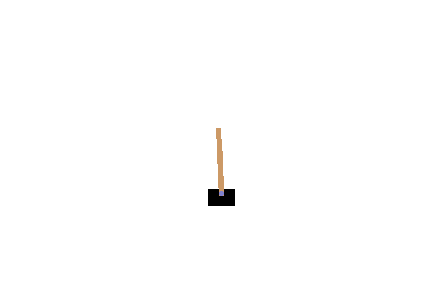
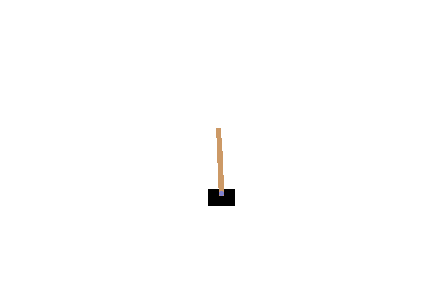
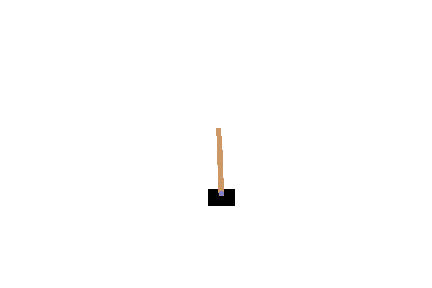
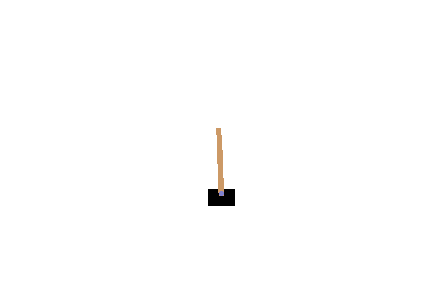
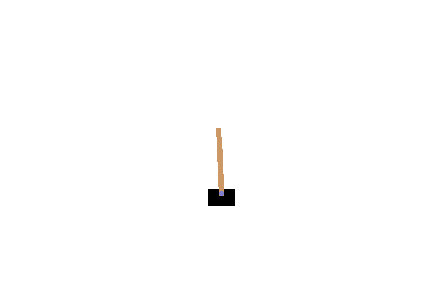
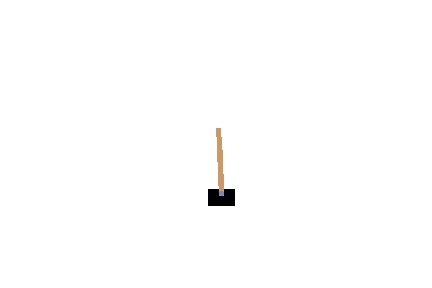
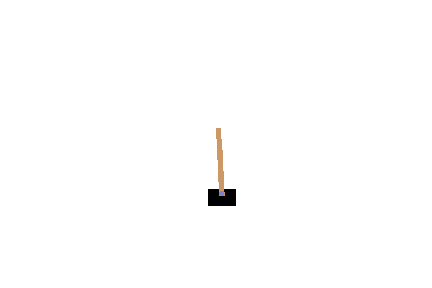
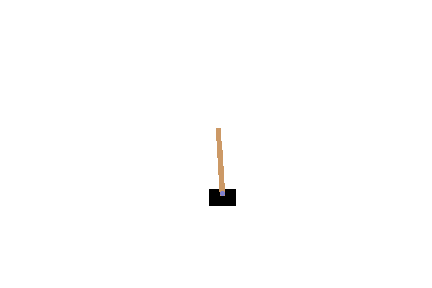
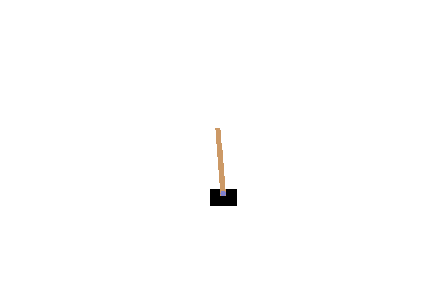
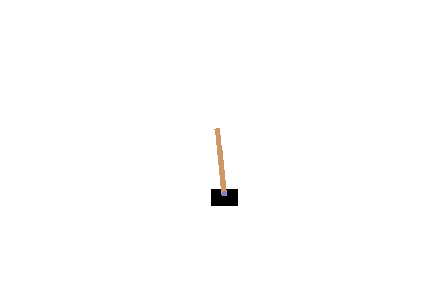
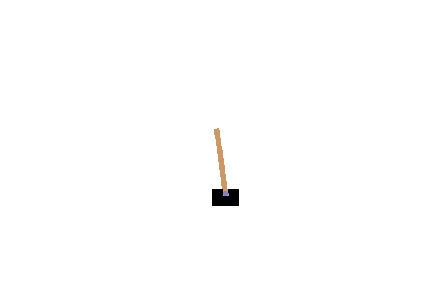
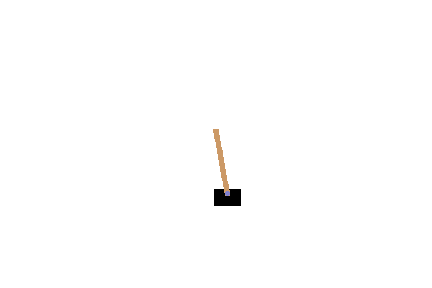

In [3]:
env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(500):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
#env.env.close()
display_frames_as_gif(frames)

# Random Agent

In [4]:
import os
import sys
import argparse

import gym
from gym import wrappers, logger
from IPython import display

In [5]:
class RandomAgent(object):
    """world's simplest agent"""
    def __init__(self, action_space):
        self.action_space = action_space
        
    def act(self, observation, reward, done):
        return self.action_space.sample()

In [6]:
outdir = './tmp/random-agent-results'
exist_outdir = not os.path.exists(outdir)
if exist_outdir:
    os.makedirs(outdir)
print(exist_outdir)

False


In [7]:
logger.set_level(logger.INFO)
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)
agent = RandomAgent(env.action_space)

INFO: Making new env: CartPole-v0
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO: Clearing 8 monitor files from previous run (because force=True was provided)


In [16]:
episode_count = 10
reward = 0
done = False
frames = []

In [12]:
def show_state(env, episode=1,  step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Episode: %d | Step: %d %s" % (env.spec.id, episode, step, info))
    plt.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

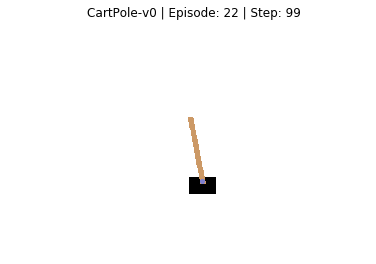

DEBUG: Writing training manifest file to C:\code\STUDY_pytorch\pytorch-tutorial\tmp\random-agent-results\openaigym.manifest.0.51984.manifest.json
INFO: Finished writing results. You can upload them to the scoreboard via gym.upload('C:\\code\\STUDY_pytorch\\pytorch-tutorial\\tmp\\random-agent-results')


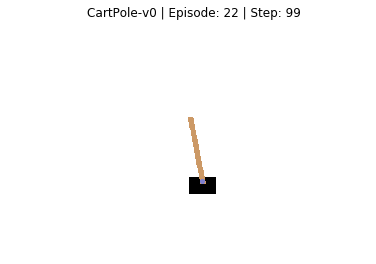

In [15]:
for i in range(episode_count):
    ob = env.reset()
    step_count = 0
    while True:
        show_state(env, i, step_count)
        action = agent.act(ob, reward, done)
        ob, reward, done, _ = env.step(action)
        step_count += 1
        if done:
            break
            
env.close()

In [17]:
env.close()